In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
telco_customer_df = pd.read_csv("churn_modelling.csv")
telco_customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Preprocessing

In [3]:
# Shape of the DataSet
telco_customer_df.shape

(7043, 21)

In [4]:
# Check if there is any duplicates
telco_customer_df.duplicated().sum()

0

In [5]:
# See the dtype of columns 
telco_customer_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Converting TotalCharges into numeric
telco_customer_df['TotalCharges'] = pd.to_numeric(telco_customer_df['TotalCharges'], errors='coerce')

In [7]:
telco_customer_df['TotalCharges'].dtypes

dtype('float64')

In [8]:
# Check for Null values
telco_customer_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

I think the 'TotalCharges' is related to 'tenure' and 'MonthlyCharges'.
Checking for similarities

<AxesSubplot: >

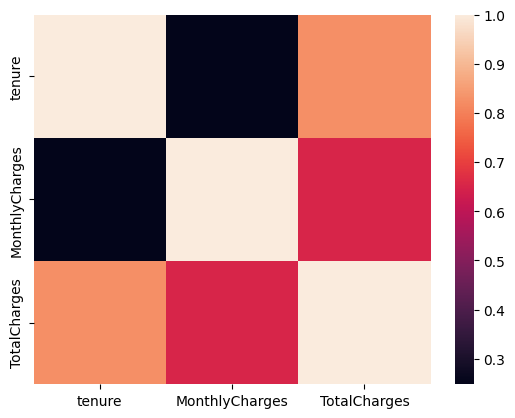

In [9]:
sns.heatmap(telco_customer_df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr())

We notice that 'TotalCharges' has a high correlation with 'tenure'.

In [10]:
telco_customer_df[telco_customer_df['TotalCharges'].isnull()][['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


It's seems that all null values in 'TotalCharges' has 0 'tenure'. Let's just drop them.

In [11]:
# Drop missing values 
telco_customer_df.dropna(inplace = True)

In [12]:
telco_customer_df.shape

(7032, 21)

In [13]:
# Drop the ID column
telco_customer_df2 = telco_customer_df.drop(columns=['customerID'])

In [14]:
telco_customer_df2.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Exploratory Data Analysis (EDA)

In [15]:
# Let's start with the target column 'Churn'
telco_customer_df2['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
# Convert No/Yes to 0/1
telco_customer_df2['Churn'] = telco_customer_df2['Churn'].apply(lambda x: 0 if x=='No' else  1)

In [17]:
telco_customer_df2['Churn'].unique()

array([0, 1], dtype=int64)

In [18]:
plt.style.use('ggplot')

In [19]:
churn_percentage = telco_customer_df2['Churn'].value_counts(normalize=True)*100
churn_percentage

0    73.421502
1    26.578498
Name: Churn, dtype: float64

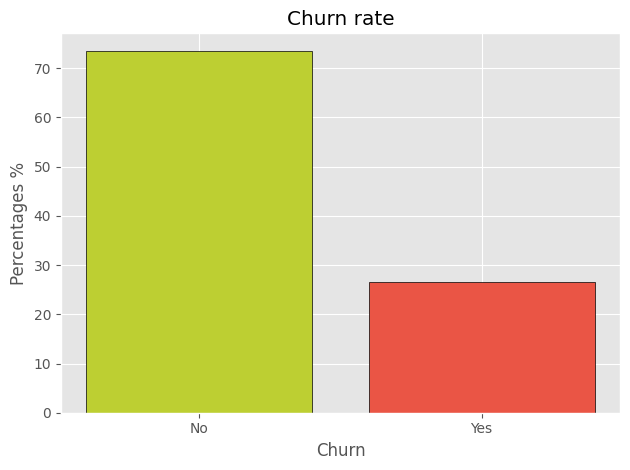

In [20]:
plt.bar(['No', 'Yes'], churn_percentage.values, 
        color=['#bdcf32', '#ea5545'], edgecolor='black')
plt.title('Churn rate')
plt.xlabel('Churn')
plt.ylabel('Percentages %')
plt.tight_layout()
plt.show();

We have almost 73% 'No' and 27% 'Yes'.

Checking 'gender' column.

In [21]:
telco_customer_df2['gender'].unique()

array(['Female', 'Male'], dtype=object)

Marking 'Male' as 1 and 'Female' as 0

In [22]:
telco_customer_df2['gender'] = telco_customer_df2['gender'].apply(lambda x: 1 if x=='Male' else 0)

In [23]:
telco_customer_df2['gender'].unique()

array([0, 1], dtype=int64)

In [24]:
gender_percentage = telco_customer_df2['gender'].value_counts(normalize=True)*100
gender_percentage

1    50.469283
0    49.530717
Name: gender, dtype: float64

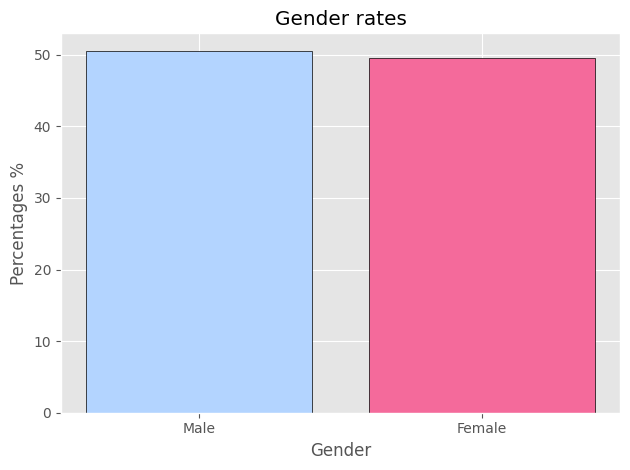

In [26]:
plt.bar(['Male', 'Female'], gender_percentage.values, 
        color=['#b3d4ff', '#f46a9b'], edgecolor='black')
plt.title('Gender rates')
plt.xlabel('Gender')
plt.ylabel('Percentages %')
plt.tight_layout()
plt.show();

We have the equal percentages of males and females

In [27]:
female_churn = telco_customer_df2[telco_customer_df2['gender']==0]['Churn'].value_counts(normalize=True)*100
male_churn = telco_customer_df2[telco_customer_df2['gender']==1]['Churn'].value_counts(normalize=True)*100
male_churn, female_churn

(0    73.795435
 1    26.204565
 Name: Churn, dtype: float64,
 0    73.040482
 1    26.959518
 Name: Churn, dtype: float64)

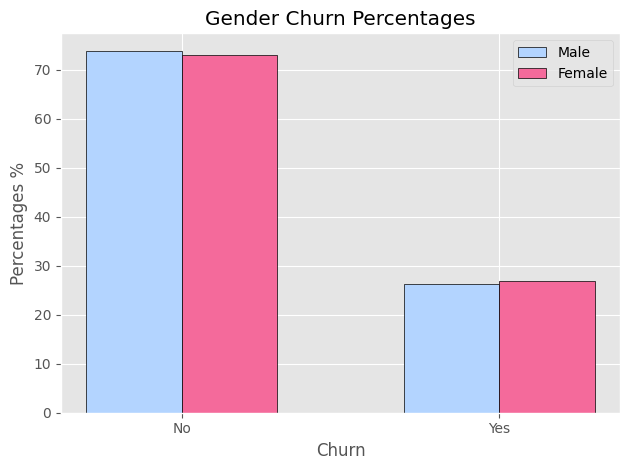

In [28]:
plt.bar([0, 1], male_churn.values, width=0.30,
        color=['#b3d4ff', '#b3d4ff'], edgecolor='black', label='Male')
plt.bar([0.30, 1.30], female_churn.values, width=0.30,
        color=['#f46a9b', '#f46a9b'], edgecolor='black', label='Female')
plt.xticks([0.15, 1.15], ['No', 'Yes'])
plt.title('Gender Churn Percentages')
plt.xlabel('Churn')
plt.ylabel('Percentages %')
plt.legend()
plt.tight_layout()
plt.show();

Now 'SeniorCitizen' column

In [29]:
telco_customer_df2['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [30]:
senior_percentage = telco_customer_df2['SeniorCitizen'].value_counts()
senior_percentage

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

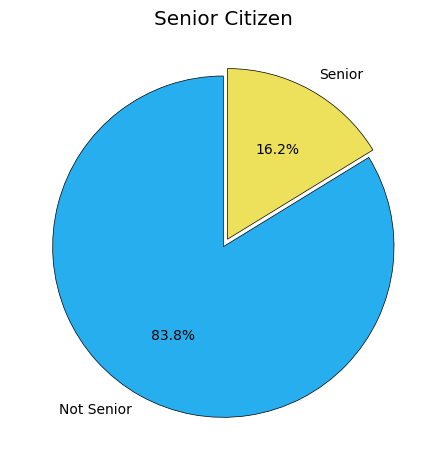

In [31]:
plt.pie(senior_percentage.values, explode=[0, 0.05], labels=['Not Senior', 'Senior'],
        wedgeprops={'edgecolor': 'black'}, startangle=90, colors=['#27aeef', '#ede15b'],
       autopct='%1.1f%%')
plt.title('Senior Citizen')
plt.tight_layout()
plt.show()

One-hot Encoding Categorical-data

In [32]:
dummy_columns = telco_customer_df2.columns[telco_customer_df2.dtypes=='object'].tolist()

In [33]:
telco_customer_df_dummies = pd.get_dummies(telco_customer_df2, columns=dummy_columns)
telco_customer_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   int64  
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int64  
 6   Partner_No                               7032 non-null   uint8  
 7   Partner_Yes                              7032 non-null   uint8  
 8   Dependents_No                            7032 non-null   uint8  
 9   Dependents_Yes                           7032 non-null   uint8  
 10  PhoneService_No                          7032 no

In [34]:
all_dummy_columns = telco_customer_df_dummies.select_dtypes('bool').columns.difference(['Churn']).tolist()

In [35]:
telco_customer_df_dummies[all_dummy_columns].head()

""
0
1
2
3
4


In [36]:
for dummy in all_dummy_columns:
    telco_customer_df_dummies[dummy] = telco_customer_df_dummies[dummy].apply(lambda x: 1 if x==True else 0)

In [37]:
telco_customer_df_dummies.columns

Index(['gender', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No'

In [38]:
telco_customer_df_dummies.shape

(7032, 45)

Feature Selection

Selecting features with some high correlation with 'Churn'.

In [39]:
telco_customer_df_dummies.corr()['Churn'][(telco_customer_df_dummies.corr()['Churn'] > 0.2) | 
                                          (telco_customer_df_dummies.corr()['Churn'] < -0.2)]

tenure                                 -0.354049
Churn                                   1.000000
InternetService_Fiber optic             0.307463
InternetService_No                     -0.227578
OnlineSecurity_No                       0.342235
OnlineSecurity_No internet service     -0.227578
OnlineBackup_No                         0.267595
OnlineBackup_No internet service       -0.227578
DeviceProtection_No                     0.252056
DeviceProtection_No internet service   -0.227578
TechSupport_No                          0.336877
TechSupport_No internet service        -0.227578
StreamingTV_No internet service        -0.227578
StreamingMovies_No internet service    -0.227578
Contract_Month-to-month                 0.404565
Contract_Two year                      -0.301552
PaymentMethod_Electronic check          0.301455
Name: Churn, dtype: float64

In [40]:
high_corr_features = telco_customer_df_dummies.corr()['Churn'][(telco_customer_df_dummies.corr()['Churn'] > 0.2) |
                                          (telco_customer_df_dummies.corr()['Churn'] < -0.2)].index.tolist()
high_corr_features.remove('Churn')
len(high_corr_features)

16

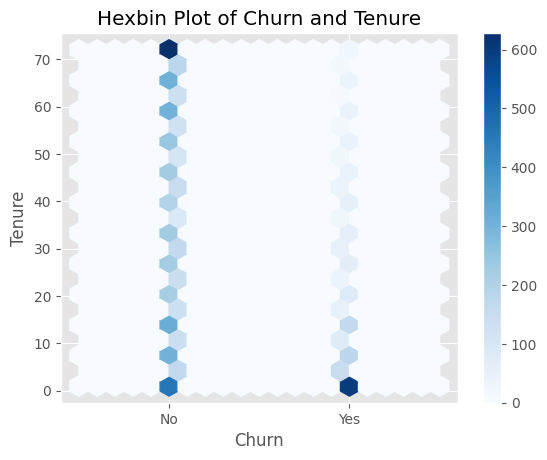

In [41]:
bin_edges = [-0.5, 0.5, 1.5]

plt.hexbin(x=telco_customer_df_dummies['Churn'], y=telco_customer_df_dummies['tenure'],
        cmap='Blues', gridsize=20, extent=[bin_edges[0], bin_edges[-1], 
        telco_customer_df_dummies['tenure'].min(), telco_customer_df_dummies['tenure'].max()])
plt.colorbar()
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Hexbin Plot of Churn and Tenure')
plt.show()

We see here that clients who have a low tenure are more likely to churn.

Handling Imbalanced Data

We are going to use SMOTE (Over_Sampling method)

In [42]:
from imblearn.over_sampling  import SMOTE

In [43]:
X = telco_customer_df_dummies[high_corr_features]
y = telco_customer_df['Churn']
X.shape, y.shape

((7032, 16), (7032,))

In [44]:
y = y.apply(lambda x: 1 if x=='Yes' else 0)

In [45]:
smote = SMOTE(k_neighbors=3)
X_smote, y_smote = smote.fit_resample(X, y)

Split Data

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, 
                                                                            y_smote, test_size=0.1, shuffle=True, 
                                                                            random_state=42)

In [48]:
# Model 1 data
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)
# Model 3 data
X_smote_train_tensor = torch.tensor(X_smote_train.values, dtype=torch.float32)
y_smote_train_tensor = torch.tensor(y_smote_train.values, dtype=torch.float32)
X_smote_test_tensor = torch.tensor(X_smote_test.values, dtype=torch.float32)
y_smote_test_tensor = torch.tensor(y_smote_test.values, dtype=torch.float32)

In [49]:
# Model 1 data
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data) 
# Model 3 data
train_smote_data = TensorDataset(X_smote_train_tensor, y_smote_train_tensor)
train_smote_loader = DataLoader(train_smote_data, batch_size=32, shuffle=True)
test_smote_data = TensorDataset(X_smote_test_tensor, y_smote_test_tensor)
test_smote_loader = DataLoader(test_smote_data)

Model Creation

Model1: for imbalanced data<br> Model3: for balanced data with SMOTE method.

In [50]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [51]:
class BinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(8)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.bn2 = nn.BatchNorm1d(8)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        self.output_layer = nn.Linear(hidden_size2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x.float())
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

Training the Model

In [52]:
input_size = 16
hidden_size1 = 8
hidden_size2 = 8
learning_rate = [0.00001, 0.00006, 0.0001, 0.0006, 0.001, 0.006, 0.01]
epochs = 400

In [53]:
model_imb_1 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_imb_2 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_imb_3 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_imb_4 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_imb_5 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_imb_6 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_imb_7 = BinaryClassifier(input_size, hidden_size1, hidden_size2)

In [54]:
model_smote_1 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_smote_2 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_smote_3 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_smote_4 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_smote_5 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_smote_6 = BinaryClassifier(input_size, hidden_size1, hidden_size2)
model_smote_7 = BinaryClassifier(input_size, hidden_size1, hidden_size2)

In [55]:
criterion = nn.BCELoss()
optimizer_imb_1 = optim.Adam(model_imb_1.parameters(), lr=learning_rate[0])
optimizer_imb_2 = optim.Adam(model_imb_2.parameters(), lr=learning_rate[1])
optimizer_imb_3 = optim.Adam(model_imb_3.parameters(), lr=learning_rate[2])
optimizer_imb_4 = optim.Adam(model_imb_4.parameters(), lr=learning_rate[3])
optimizer_imb_5 = optim.Adam(model_imb_5.parameters(), lr=learning_rate[4])
optimizer_imb_6 = optim.Adam(model_imb_6.parameters(), lr=learning_rate[5])
optimizer_imb_7 = optim.Adam(model_imb_7.parameters(), lr=learning_rate[6])
optimizer_smote_1 = optim.Adam(model_smote_1.parameters(), lr=learning_rate[0])
optimizer_smote_2 = optim.Adam(model_smote_2.parameters(), lr=learning_rate[1])
optimizer_smote_3 = optim.Adam(model_smote_3.parameters(), lr=learning_rate[2])
optimizer_smote_4 = optim.Adam(model_smote_4.parameters(), lr=learning_rate[3])
optimizer_smote_5 = optim.Adam(model_smote_5.parameters(), lr=learning_rate[4])
optimizer_smote_6 = optim.Adam(model_smote_6.parameters(), lr=learning_rate[5])
optimizer_smote_7 = optim.Adam(model_smote_7.parameters(), lr=learning_rate[6])

In [56]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_imb_1.to(device)
model_imb_2.to(device)
model_imb_3.to(device)
model_imb_4.to(device)
model_imb_5.to(device)
model_imb_6.to(device)
model_imb_7.to(device)
model_smote_1.to(device)
model_smote_2.to(device)
model_smote_3.to(device)
model_smote_4.to(device)
model_smote_5.to(device)
model_smote_6.to(device)
model_smote_7.to(device)

BinaryClassifier(
  (layer1): Linear(in_features=16, out_features=8, bias=True)
  (bn1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (layer2): Linear(in_features=8, out_features=8, bias=True)
  (bn2): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (output_layer): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [57]:
model_imb_loss = [[], [], [], [], [], [], []]
model_smote_loss= [[], [], [], [], [], [], []]

mean_model_imb_loss = [[], [], [], [], [], [], []]
mean_model_smote_loss = [[], [], [], [], [], [], []]
# Training the model
for epoch in range(epochs):
    
    # Model imbalanced Data Training
    for inputs_imb, labels_imb in train_loader:
        # Move batch to GPU
        inputs_imb, labels_imb = inputs_imb.to(device), labels_imb.to(device)

        # Zero the gradients
        optimizer_imb_1.zero_grad()
        optimizer_imb_2.zero_grad()
        optimizer_imb_3.zero_grad()
        optimizer_imb_4.zero_grad()
        optimizer_imb_5.zero_grad()
        optimizer_imb_6.zero_grad()
        optimizer_imb_7.zero_grad()

        # Forward pass
        outputs_imb_1 = model_imb_1(inputs_imb)
        loss_imb_1 = criterion(outputs_imb_1, labels_imb.view(-1, 1))
        outputs_imb_2 = model_imb_2(inputs_imb)
        loss_imb_2 = criterion(outputs_imb_2, labels_imb.view(-1, 1))
        outputs_imb_3 = model_imb_3(inputs_imb)
        loss_imb_3 = criterion(outputs_imb_3, labels_imb.view(-1, 1))
        outputs_imb_4 = model_imb_4(inputs_imb)
        loss_imb_4 = criterion(outputs_imb_4, labels_imb.view(-1, 1))
        outputs_imb_5 = model_imb_5(inputs_imb)
        loss_imb_5 = criterion(outputs_imb_5, labels_imb.view(-1, 1))
        outputs_imb_6 = model_imb_6(inputs_imb)
        loss_imb_6 = criterion(outputs_imb_6, labels_imb.view(-1, 1))
        outputs_imb_7 = model_imb_7(inputs_imb)
        loss_imb_7 = criterion(outputs_imb_7, labels_imb.view(-1, 1))
        
        # Backward pass and optimization
        loss_imb_1.backward()
        optimizer_imb_1.step()
        loss_imb_2.backward()
        optimizer_imb_2.step()
        loss_imb_3.backward()
        optimizer_imb_3.step()
        loss_imb_4.backward()
        optimizer_imb_4.step()
        loss_imb_5.backward()
        optimizer_imb_5.step()
        loss_imb_6.backward()
        optimizer_imb_6.step()
        loss_imb_7.backward()
        optimizer_imb_7.step()
        
        model_imb_loss[0].append(loss_imb_1.item())
        model_imb_loss[1].append(loss_imb_2.item())
        model_imb_loss[2].append(loss_imb_3.item())
        model_imb_loss[3].append(loss_imb_4.item())
        model_imb_loss[4].append(loss_imb_5.item())
        model_imb_loss[5].append(loss_imb_6.item())
        model_imb_loss[6].append(loss_imb_7.item())
        
    # Model Smote Training
    for inputs_smote, labels_smote in train_smote_loader:
        # Move batch to GPU
        inputs_smote, labels_smote = inputs_smote.to(device), labels_smote.to(device)

        # Zero the gradients
        optimizer_smote_1.zero_grad()
        optimizer_smote_2.zero_grad()
        optimizer_smote_3.zero_grad()
        optimizer_smote_4.zero_grad()
        optimizer_smote_5.zero_grad()
        optimizer_smote_6.zero_grad()
        optimizer_smote_7.zero_grad()

        # Forward pass
        outputs_smote_1 = model_smote_1(inputs_smote)
        loss_smote_1 = criterion(outputs_smote_1, labels_smote.view(-1, 1))
        outputs_smote_2 = model_smote_2(inputs_smote)
        loss_smote_2 = criterion(outputs_smote_2, labels_smote.view(-1, 1))
        outputs_smote_3 = model_smote_3(inputs_smote)
        loss_smote_3 = criterion(outputs_smote_3, labels_smote.view(-1, 1))
        outputs_smote_4 = model_smote_4(inputs_smote)
        loss_smote_4 = criterion(outputs_smote_4, labels_smote.view(-1, 1))
        outputs_smote_5 = model_smote_5(inputs_smote)
        loss_smote_5 = criterion(outputs_smote_5, labels_smote.view(-1, 1))
        outputs_smote_6 = model_smote_6(inputs_smote)
        loss_smote_6 = criterion(outputs_smote_6, labels_smote.view(-1, 1))
        outputs_smote_7 = model_smote_7(inputs_smote)
        loss_smote_7 = criterion(outputs_smote_7, labels_smote.view(-1, 1))

        # Backward pass and optimization
        loss_smote_1.backward()
        optimizer_smote_1.step()
        loss_smote_2.backward()
        optimizer_smote_2.step()
        loss_smote_3.backward()
        optimizer_smote_3.step()
        loss_smote_4.backward()
        optimizer_smote_4.step()
        loss_smote_5.backward()
        optimizer_smote_5.step()
        loss_smote_6.backward()
        optimizer_smote_6.step()
        loss_smote_7.backward()
        optimizer_smote_7.step()

    # Print the loss at the end of each epoch
        model_smote_loss[0].append(loss_smote_1.item())
        model_smote_loss[1].append(loss_smote_2.item())
        model_smote_loss[2].append(loss_smote_3.item())
        model_smote_loss[3].append(loss_smote_4.item())
        model_smote_loss[4].append(loss_smote_5.item())
        model_smote_loss[5].append(loss_smote_6.item())
        model_smote_loss[6].append(loss_smote_7.item())
        
    if epoch%10==0:
        for i in range(7):
            mean_model_imb_loss[i].append(np.sum(model_imb_loss[i]) / len(model_imb_loss[i]))
            mean_model_smote_loss[i].append(np.sum(model_smote_loss[i]) / len(model_smote_loss[i]))
        model_imb_loss = [[], [], [], [], [], [], []]
        model_smote_loss= [[], [], [], [], [], [], []]
        print(f' Epoch {epoch}/{epochs}\n Loss Imb models: 1={mean_model_imb_loss[0][-1]:.4f} 2={mean_model_imb_loss[1][-1]:.4f} 3={mean_model_imb_loss[2][-1]:.4f} 4={mean_model_imb_loss[3][-1]:.4f} 5={mean_model_imb_loss[4][-1]:.4f} 6={mean_model_imb_loss[5][-1]:.4f} 7={mean_model_imb_loss[6][-1]:.4f}\nLoss Smote models: 1={mean_model_smote_loss[0][-1]:.4f} 2={mean_model_smote_loss[1][-1]:.4f} 3={mean_model_smote_loss[2][-1]:.4f} 4={mean_model_smote_loss[3][-1]:.4f} 5={mean_model_smote_loss[4][-1]:.4f} 6={mean_model_smote_loss[5][-1]:.4f} 7={mean_model_smote_loss[6][-1]:.4f}')
        


 Epoch 0/400
 Loss Imb models: 1=0.7545 2=0.6354 3=0.6209 4=0.6538 5=0.7115 6=0.5396 7=0.5305
Loss Smote models: 1=0.7837 2=0.7086 3=0.7558 4=0.6737 5=0.6786 6=0.6098 7=0.6124
 Epoch 10/400
 Loss Imb models: 1=0.7387 2=0.5897 3=0.5618 4=0.5146 5=0.5113 6=0.4766 7=0.4777
Loss Smote models: 1=0.7591 2=0.6677 3=0.6643 4=0.5797 5=0.5727 6=0.5594 7=0.5634
 Epoch 20/400
 Loss Imb models: 1=0.7082 2=0.5410 3=0.5208 4=0.4833 5=0.4830 6=0.4707 7=0.4743
Loss Smote models: 1=0.7270 2=0.6253 3=0.6029 4=0.5612 5=0.5529 6=0.5564 7=0.5610
 Epoch 30/400
 Loss Imb models: 1=0.6834 2=0.5207 3=0.5025 4=0.4775 5=0.4758 6=0.4707 7=0.4748
Loss Smote models: 1=0.7020 2=0.6035 3=0.5853 4=0.5603 5=0.5513 6=0.5507 7=0.5575
 Epoch 40/400
 Loss Imb models: 1=0.6630 2=0.5089 3=0.4925 4=0.4781 5=0.4726 6=0.4695 7=0.4709
Loss Smote models: 1=0.6886 2=0.5901 3=0.5715 4=0.5593 5=0.5505 6=0.5502 7=0.5583
 Epoch 50/400
 Loss Imb models: 1=0.6467 2=0.5021 3=0.4883 4=0.4778 5=0.4715 6=0.4702 7=0.4718
Loss Smote models: 1=

Evaluation of the Models

Accuracy & F1_Score

In [58]:
# Evaluation function to calculate accuracy
def calculate_accuracy(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            
            # Convert probabilities to binary predictions (0 or 1)
            predictions = (outputs >= 0.5).float()

            # Count correct predictions
            correct_predictions += (predictions == labels.view_as(predictions)).sum().item()
            total_samples += labels.size(0)

    accuracy = correct_predictions / total_samples
    return accuracy

In [59]:
def calculate_metrics(model, data_loader):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    true_labels = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)
            
            # Convert probabilities to binary predictions (0 or 1)
            batch_predictions = (outputs >= 0.5).float()

            predictions.extend(batch_predictions.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Convert lists to numpy arrays
    predictions = np.array(predictions)
    true_labels = np.array(true_labels)

    # Calculate precision, recall, and F1 score
    precision = precision_score(true_labels, predictions, zero_division=1)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions, zero_division=1)

    return precision, recall, f1

In [61]:
def print_acc(model_imb, model_smote, lr):
    train_accuracy = calculate_accuracy(model_imb, train_loader)
    print(f'Model imb lr {lr}:')
    print(f'\tTraining Accuracy: {train_accuracy:.4f}')

    test_accuracy = calculate_accuracy(model_imb, test_loader)  # Assuming you have a test data loader
    print(f'\tTest Accuracy: {test_accuracy:.4f}')

    # Model 3
    print(f'Model smote lr {lr}:')
    train_accuracy = calculate_accuracy(model_smote, train_smote_loader)
    print(f'\tTraining Accuracy: {train_accuracy:.4f}')

    test_accuracy = calculate_accuracy(model_smote, test_smote_loader)  # Assuming you have a test data loader
    print(f'\tTest Accuracy: {test_accuracy:.4f}')
    print('-'*100)

In [62]:
def print_metrics(model_imb, model_smote, lr):
    print(f'Model imb lr {lr}:')
    train_precision, train_recall, train_f1 = calculate_metrics(model_imb, train_loader)
    print(f'\tTraining Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

    test_precision, test_recall, test_f1 = calculate_metrics(model_imb, test_loader)
    print(f'\tTesting Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')

    print(f'Model smote lr {lr}:')
    train_precision, train_recall, trian_f1 = calculate_metrics(model_smote, train_loader)
    print(f'\tTraining Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')

    test_precision, test_recall, test_f1 = calculate_metrics(model_smote, test_loader)
    print(f'\tTesting Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}')
    print('-'*100)
    

In [63]:
def conf_matrix(model_imb, model_smote, lr):
    model_imb.eval()
    model_smote.eval()

    # Lists to store true labels and predicted labels for both models
    true_labels_model1 = []
    predicted_labels_model1 = []

    true_labels_model3 = []
    predicted_labels_model3 = []

    # Iterate over the dataset and make predictions for model1
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_imb(inputs)
            predictions = (outputs >= 0.5).float()
            true_labels_model1.extend(labels.cpu().numpy())
            predicted_labels_model1.extend(predictions.cpu().numpy())

    # Iterate over the dataset and make predictions for model3
    with torch.no_grad():
        for inputs, labels in test_smote_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model_smote(inputs)
            predictions = (outputs >= 0.5).float()
            true_labels_model3.extend(labels.cpu().numpy())
            predicted_labels_model3.extend(predictions.cpu().numpy())

    # Create confusion matrices for both models
    conf_matrix_model1 = confusion_matrix(true_labels_model1, predicted_labels_model1)
    conf_matrix_model3 = confusion_matrix(true_labels_model3, predicted_labels_model3)

    conf_matrix_percent_model1 = (conf_matrix_model1 / np.sum(conf_matrix_model1) * 100).round().astype(int)
    conf_matrix_percent_model3 = (conf_matrix_model3 / np.sum(conf_matrix_model3) * 100).round().astype(int)

    # Display the confusion matrices using heatmaps side by side
    class_names = [str(i) for i in range(conf_matrix_model1.shape[0])]  # Replace with your actual class names

    plt.figure(figsize=(10, 4))

    # Plot confusion matrix for model1
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix_percent_model1, annot=True, fmt="d", cmap="Greens", xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Predicted by Model IMB')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix IMB lr={lr}')

    # Plot confusion matrix for model3
    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix_percent_model3, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, 
                yticklabels=class_names)
    plt.xlabel('Predicted by Model SMOTE')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix SMOTE lr={lr}')

    plt.tight_layout()
    plt.show()


In [64]:
print_acc(model_imb_1, model_smote_1, learning_rate[0])
print_acc(model_imb_2, model_smote_2, learning_rate[1])
print_acc(model_imb_3, model_smote_3, learning_rate[2])
print_acc(model_imb_4, model_smote_4, learning_rate[3])
print_acc(model_imb_5, model_smote_5, learning_rate[4])
print_acc(model_imb_6, model_smote_6, learning_rate[5])
print_acc(model_imb_7, model_smote_7, learning_rate[6])

Model imb lr 1e-05:
	Training Accuracy: 0.7351
	Test Accuracy: 0.7259
Model smote lr 1e-05:
	Training Accuracy: 0.7528
	Test Accuracy: 0.7435
----------------------------------------------------------------------------------------------------
Model imb lr 6e-05:
	Training Accuracy: 0.7927
	Test Accuracy: 0.7784
Model smote lr 6e-05:
	Training Accuracy: 0.7609
	Test Accuracy: 0.7619
----------------------------------------------------------------------------------------------------
Model imb lr 0.0001:
	Training Accuracy: 0.7936
	Test Accuracy: 0.7841
Model smote lr 0.0001:
	Training Accuracy: 0.7548
	Test Accuracy: 0.7493
----------------------------------------------------------------------------------------------------
Model imb lr 0.0006:
	Training Accuracy: 0.7905
	Test Accuracy: 0.7656
Model smote lr 0.0006:
	Training Accuracy: 0.7553
	Test Accuracy: 0.7638
----------------------------------------------------------------------------------------------------
Model imb lr 0.001:
	Tra

In [65]:
print_metrics(model_imb_1, model_smote_1, learning_rate[0])
print_metrics(model_imb_2, model_smote_2, learning_rate[1])
print_metrics(model_imb_3, model_smote_3, learning_rate[2])
print_metrics(model_imb_4, model_smote_4, learning_rate[3])
print_metrics(model_imb_5, model_smote_5, learning_rate[4])
print_metrics(model_imb_6, model_smote_6, learning_rate[5])
print_metrics(model_imb_7, model_smote_7, learning_rate[6])

Model imb lr 1e-05:
	Training Precision: 1.0000, Recall: 0.0000, F1: 0.0000
	Testing Precision: 1.0000, Recall: 0.0000, F1: 0.0000
Model smote lr 1e-05:
	Training Precision: 0.4954, Recall: 0.8061, F1: 0.0000
	Testing Precision: 0.5034, Recall: 0.7720, F1: 0.6094
----------------------------------------------------------------------------------------------------
Model imb lr 6e-05:
	Training Precision: 0.6853, Recall: 0.4016, F1: 0.5064
	Testing Precision: 0.6697, Recall: 0.3782, F1: 0.4834
Model smote lr 6e-05:
	Training Precision: 0.5368, Recall: 0.7697, F1: 0.5064
	Testing Precision: 0.5368, Recall: 0.7565, F1: 0.6280
----------------------------------------------------------------------------------------------------
Model imb lr 0.0001:
	Training Precision: 0.6817, Recall: 0.4141, F1: 0.5152
	Testing Precision: 0.6814, Recall: 0.3990, F1: 0.5033
Model smote lr 0.0001:
	Training Precision: 0.4964, Recall: 0.8132, F1: 0.5152
	Testing Precision: 0.4951, Recall: 0.7824, F1: 0.6064
----

We Can notice that Using SMOTE with 0.001 learning rate gave us the best F1 result: <b>0.6301</b>

Confusion Matrix

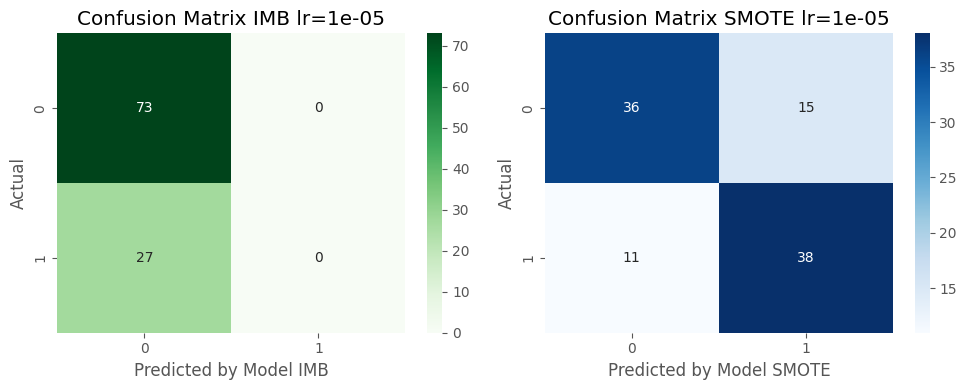

In [66]:
conf_matrix(model_imb_1, model_smote_1, learning_rate[0])

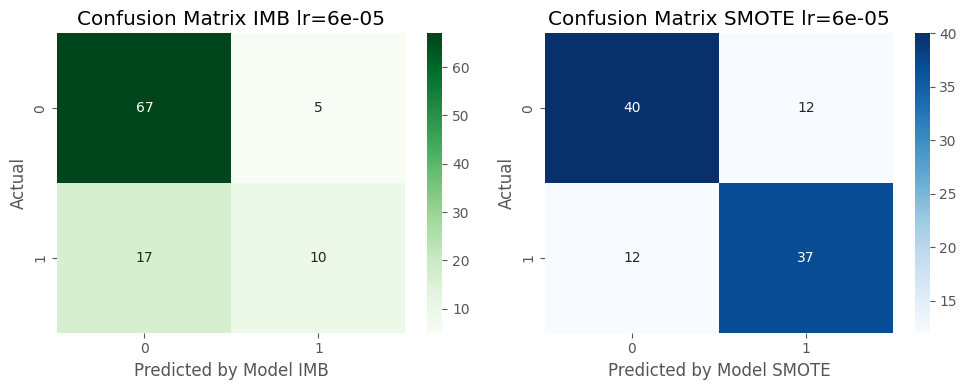

In [67]:
conf_matrix(model_imb_2, model_smote_2, learning_rate[1])

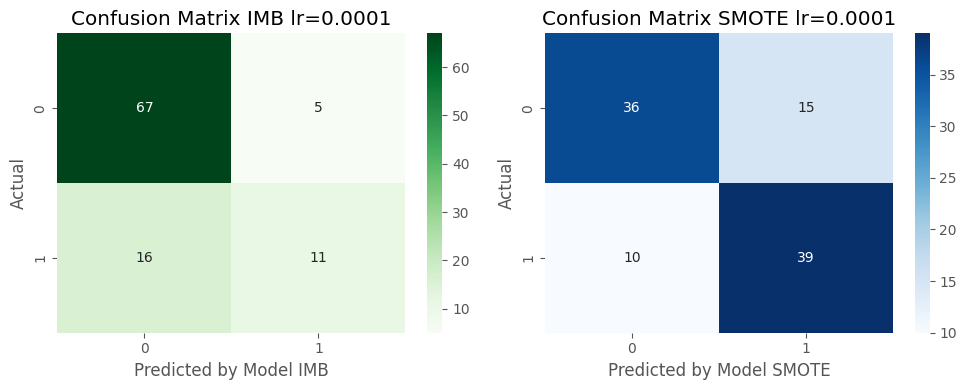

In [68]:
conf_matrix(model_imb_3, model_smote_3, learning_rate[2])

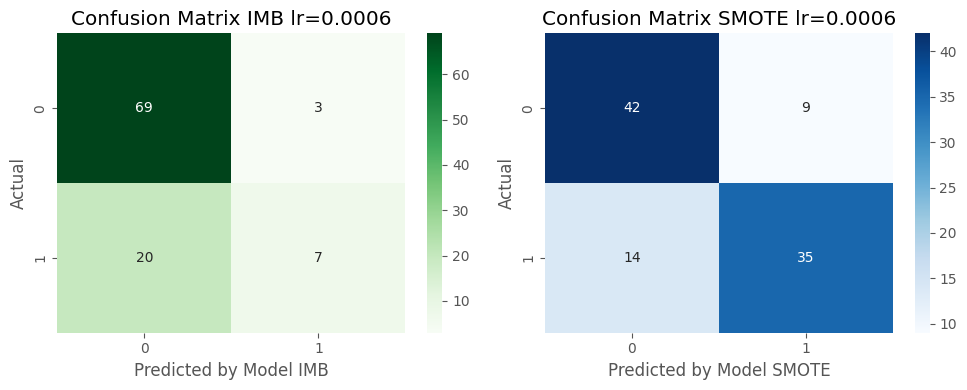

In [69]:
conf_matrix(model_imb_4, model_smote_4, learning_rate[3])

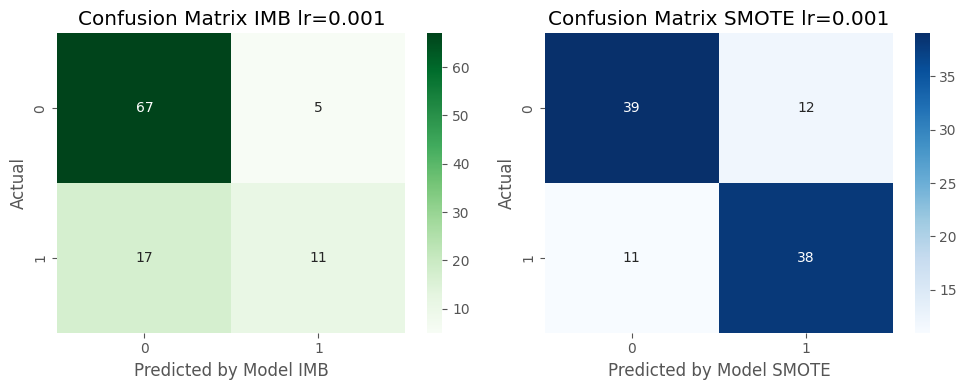

In [70]:
conf_matrix(model_imb_5, model_smote_5, learning_rate[4])

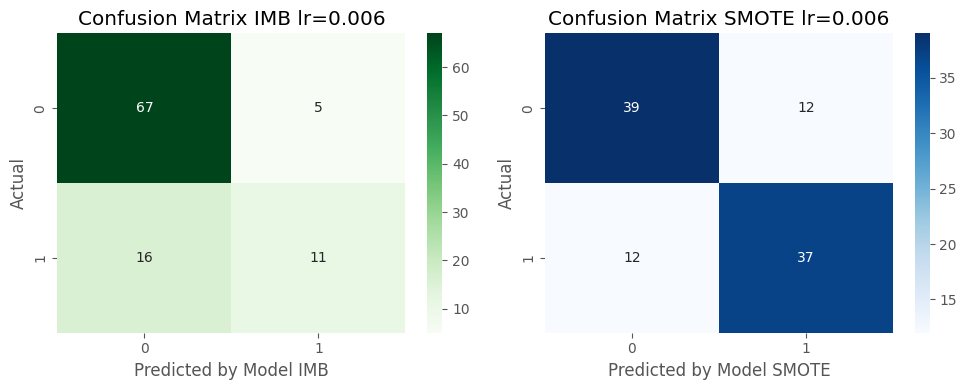

In [71]:
conf_matrix(model_imb_6, model_smote_6, learning_rate[5])

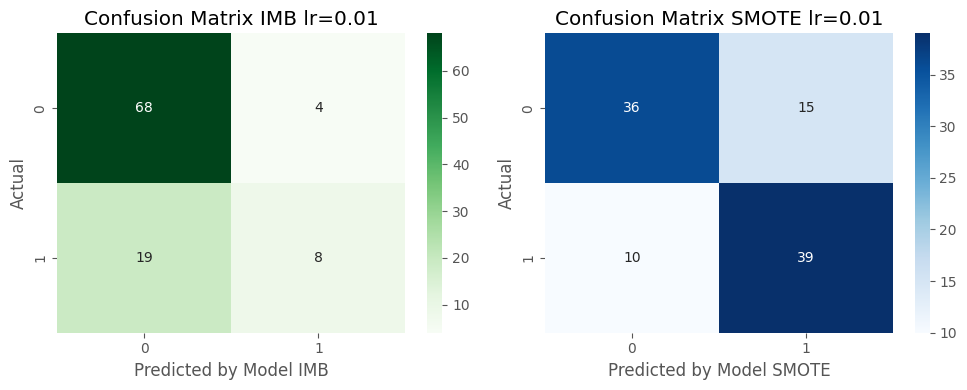

In [72]:
conf_matrix(model_imb_7, model_smote_7, learning_rate[6])